#Task 7: Матрица рассеяния (scatter matrix)#
Помните, как мы пытались выяснить, есть ли корреляция между количеством посещений ленты новостей и средним значением дельты (разницы между датой первого коммита и сроком сдачи лабораторного задания)? Проблема в том, что коэффициент корреляции показывает наличие линейной взаимосвязи между двумя переменными. Но что, если она не линейная? Как мы можем об этом узнать? Правильно — с помощью графиков!

Выполните необходимые шаги по созданию следующего графика:

In [1]:
import sqlite3, pandas as pd, matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = '/content/drive/MyDrive/School21/day12'

Mounted at /content/drive


##1. Создайте датафрейм, в котором для каждого пользователя тестовой группы имеется среднее значение дельты, количество просмотров страниц и количество коммитов.

##2. Не учитывайте лабораторное задание project1 при расчете среднего значения дельты и количества коммитов.

##3. Возьмите количество коммитов из таблицы checker.

##4. Используйте фильтр status = 'ready' для коммитов.

In [3]:
conn = sqlite3.connect(f'{path}/data/checking-logs.sqlite')
req = '''
SELECT
  t1.uid,
  delta as avg_diff,
  viewscount as pageviews,
  num_counts
FROM
  (SELECT uid, COUNT() as num_counts
  FROM checker
  WHERE status = 'ready' AND labname!='project1' AND checker.uid LIKE 'user_%'
  GROUP BY uid) as t1

JOIN (
  SELECT uid,  COUNT() as viewscount
  FROM pageviews
  GROUP by uid
) as t2
ON t1.uid=t2.uid

JOIN (
  SELECT uid, AVG((strftime('%s', first_commit) - deadlines)/3600) as delta
FROM (
  SELECT
    MIN(checker.timestamp) as first_commit,
    checker.uid,
    checker.labname
  FROM checker
  JOIN pageviews ON pageviews.uid=checker.uid
  WHERE status='ready' AND numTrials=1 AND labname!='project1' AND checker.uid LIKE 'user_%'
GROUP BY checker.uid, labname) as t1
JOIN deadlines ON labname=labs
GROUP BY uid) as t3
ON t1.uid=t3.uid
'''

In [4]:
df = pd.io.sql.read_sql(req, conn)

In [5]:
df.shape

(11, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uid         11 non-null     object 
 1   avg_diff    11 non-null     float64
 2   pageviews   11 non-null     int64  
 3   num_counts  11 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 480.0+ bytes


##5. Размер figsize остается прежним; размер шрифта и цветовую палитру можно выбрать по своему усмотрению.

##6. Размер точек — 200.

##7. Ширина линий на графиках, расположенных по главной диагонали (kde) — 3.

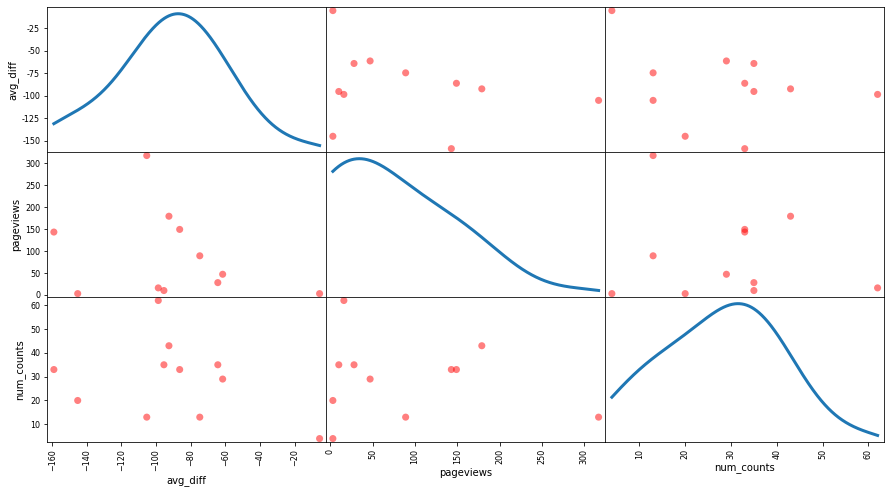

In [7]:
pd.plotting.scatter_matrix(df, color='red', diagonal='kde', figsize=(15,8), s=200, density_kwds = {'linewidth':3})
plt.show()

In [8]:
conn.close()

##8. В конце Jupyter Notebook создайте markdown-ячейку и вставьте в нее следующие вопросы.

*  «Верно ли, что если у пользователя меньше просмотров страницы, то он, скорее всего, имеет меньшее число коммитов?». Ответ: да или нет.
*   «Верно ли, что если у пользователя меньше просмотров страницы, то, скорее всего, у него будет небольшое среднее значение дельты (разница между датой первого коммита и сроком сдачи лабораторного задания)?». Ответ: да или нет.
*   «Верно ли, что существует много пользователей с небольшим количеством коммитов и мало пользователей с большим количеством коммитов?». Ответ: да или нет.
*   «Верно ли, что существует много пользователей с небольшим средним значением дельты и мало пользователей с большим средним значением дельты?». Ответ: да или нет.

«Верно ли, что если у пользователя меньше просмотров страницы, то он, скорее всего, имеет меньшее число коммитов?». **нет**

«Верно ли, что если у пользователя меньше просмотров страницы, то, скорее всего, у него будет небольшое среднее значение дельты (разница между датой первого коммита и сроком сдачи лабораторного задания)?».**нет**

«Верно ли, что существует много пользователей с небольшим количеством коммитов и мало пользователей с большим количеством коммитов?». **да**

«Верно ли, что существует много пользователей с небольшим средним значением дельты и мало пользователей с большим средним значением дельты?». **нет**